#This is the Data Exploration Jupyter Sample

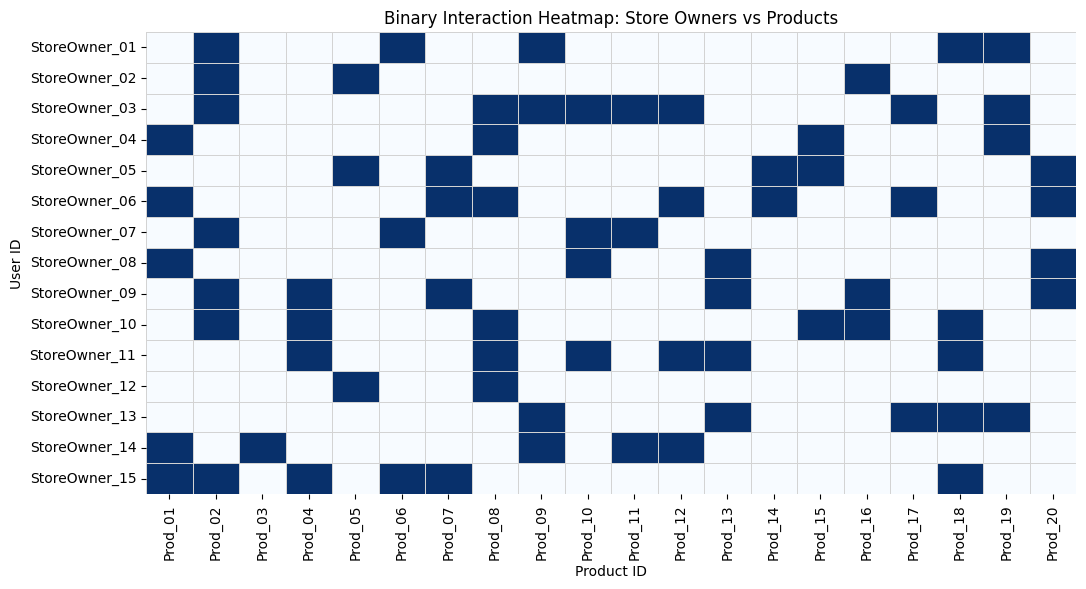

Step 4: User Similarity Matrix (Top 5x5):


User,StoreOwner_01,StoreOwner_02,StoreOwner_03,StoreOwner_04,StoreOwner_05
User,,,,,
StoreOwner_01,1.000000,0.258199,0.474342,0.223607,0.000000
StoreOwner_02,0.258199,1.000000,0.204124,0.000000,0.258199
StoreOwner_03,0.474342,0.204124,1.000000,0.353553,0.000000
StoreOwner_04,0.223607,0.000000,0.353553,1.000000,0.223607
StoreOwner_05,0.000000,0.258199,0.000000,0.223607,1.000000



--- Recommendation Results for StoreOwner_01 ---
Most Similar Peer: StoreOwner_13 (Score: 0.60)
Recommended Products: ['Prod_13', 'Prod_17']


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import FileLink

# 2. IMPORT DATA FROM CSV
# This is where your actual recommendation engine logic begins
df = pd.read_csv('utility_matrix.csv', index_col=0)

# 3. VISUALIZE THE UTILITY MATRIX
plt.figure(figsize=(12, 6))
sns.heatmap(df, cmap='Blues', cbar=False, linewidths=0.5, linecolor='lightgrey')
plt.title('Binary Interaction Heatmap: Store Owners vs Products')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()

# 4. CALCULATE USER-USER SIMILARITY
# This tells us how similar StoreOwners are based on purchase history
user_sim = cosine_similarity(df)
user_sim_df = pd.DataFrame(user_sim, index=df.index, columns=df.index)

print("Step 4: User Similarity Matrix (Top 5x5):")
display(user_sim_df.iloc[:5, :5])

# 5. GENERATE A SAMPLE RECOMMENDATION
# Example: Find products for StoreOwner_01 that they haven't bought yet
target_user = 'StoreOwner_01'

# Find the most similar user to StoreOwner_01 (excluding themselves)
similar_user = user_sim_df[target_user].sort_values(ascending=False).index[1]
similarity_score = user_sim_df[target_user].sort_values(ascending=False).values[1]

# Identify products the similar user bought but target user hasn't
target_user_bought = df.loc[target_user] == 1
similar_user_bought = df.loc[similar_user] == 1
recommendations = df.columns[~target_user_bought & similar_user_bought].tolist()

print(f"\n--- Recommendation Results for {target_user} ---")
print(f"Most Similar Peer: {similar_user} (Score: {similarity_score:.2f})")
print(f"Recommended Products: {recommendations}")